# <center>Stroke Prediction Using Machine Learning

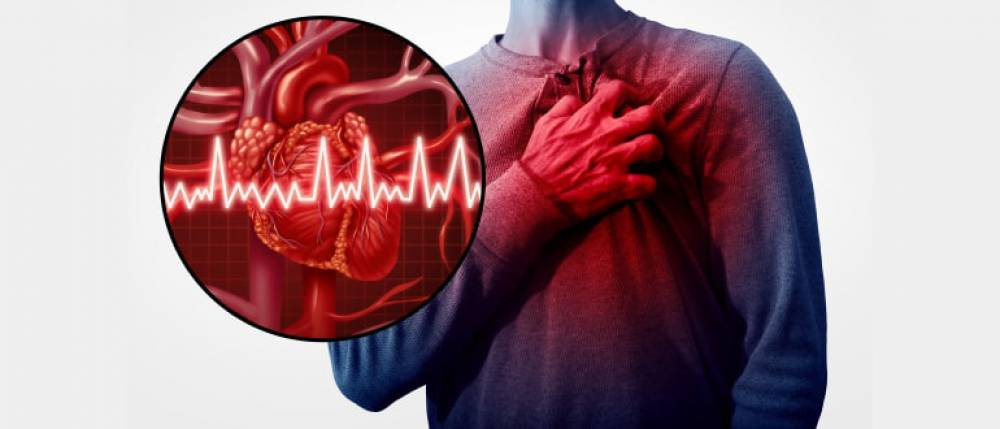

##### Dataset Link
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df = pd.read_csv('./Stroke Prediction.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1132,18205,Female,1,0,0,No,children,Rural,110.17,20.3,Unknown,0
1133,13622,Male,6,0,0,No,children,Rural,92.98,18.9,Unknown,0
1134,59749,Male,81,0,0,Yes,Private,Urban,234.35,25.3,formerly smoked,0
1135,12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1085 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


In [4]:
df.shape

(1137, 12)

In [5]:
df.describe()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1137.000000,1137.000000,1137.000000,1137.000000,1085.000000,1137.000000
mean,36750.933157,0.118734,0.068602,107.664002,29.198065,0.120493
std,21112.281253,0.323617,0.252887,47.618723,7.669615,0.325680
min,77.000000,0.000000,0.000000,55.270000,11.300000,0.000000
25%,17986.000000,0.000000,0.000000,77.600000,24.100000,0.000000
50%,37479.000000,0.000000,0.000000,91.820000,28.500000,0.000000
75%,55410.000000,0.000000,0.000000,113.850000,33.200000,0.000000
max,72918.000000,1.000000,1.000000,266.590000,64.400000,1.000000


In [6]:
df.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [7]:
df.bmi.fillna(df.bmi.mean(), inplace=True)

In [8]:
df.duplicated().sum()

0

##### Univariate Analysis

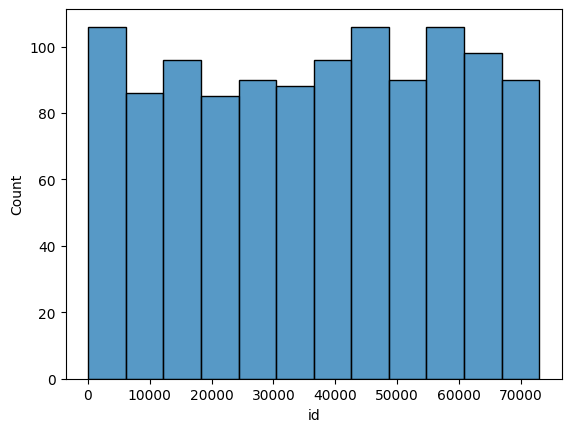

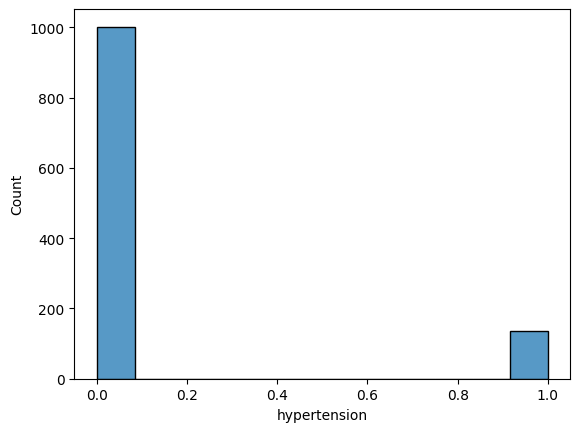

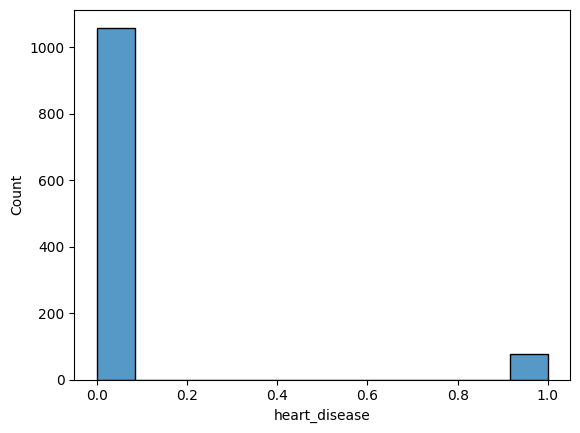

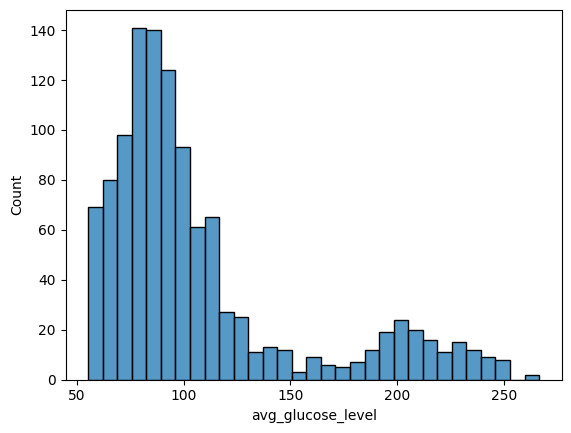

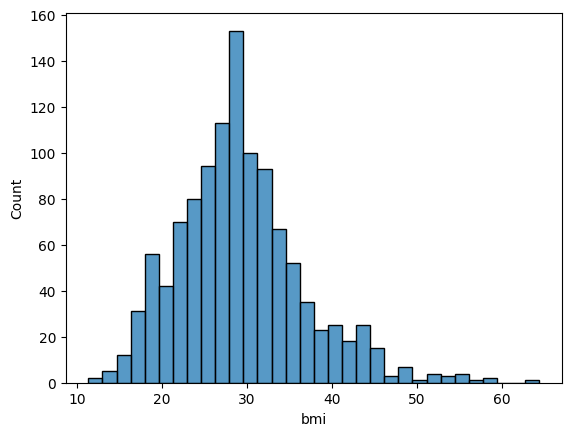

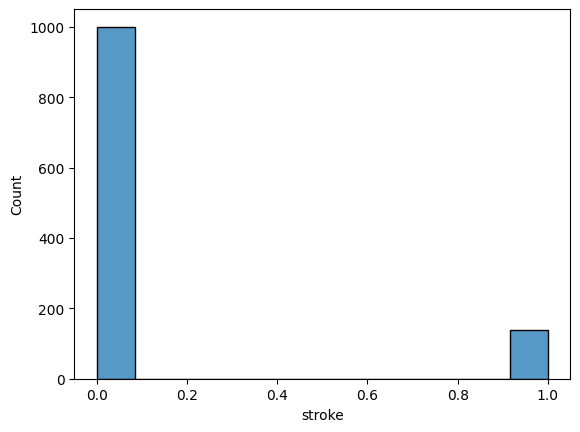

In [9]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.histplot(x=df[i])
        plt.show()

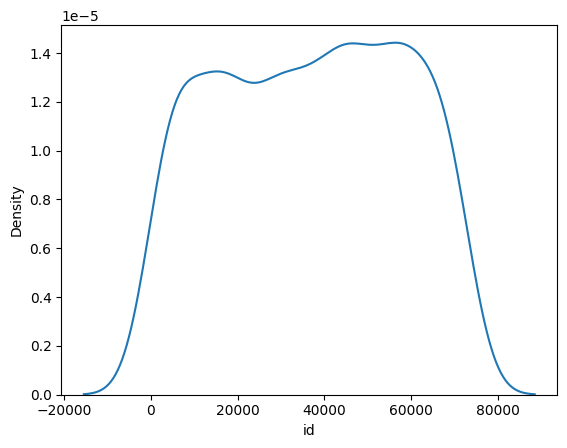

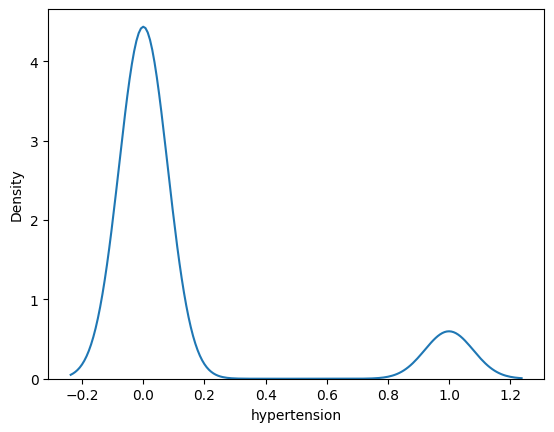

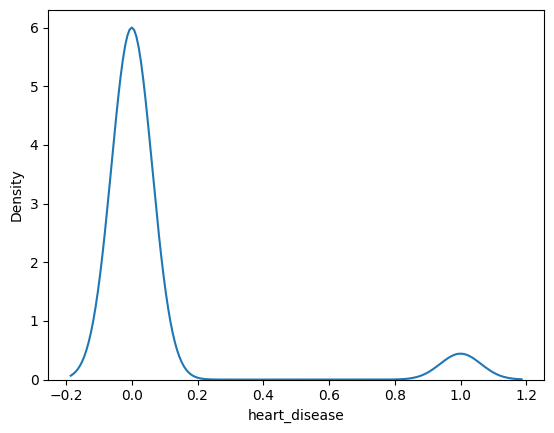

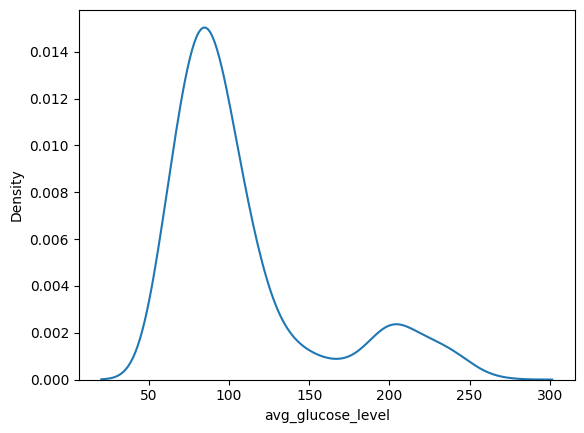

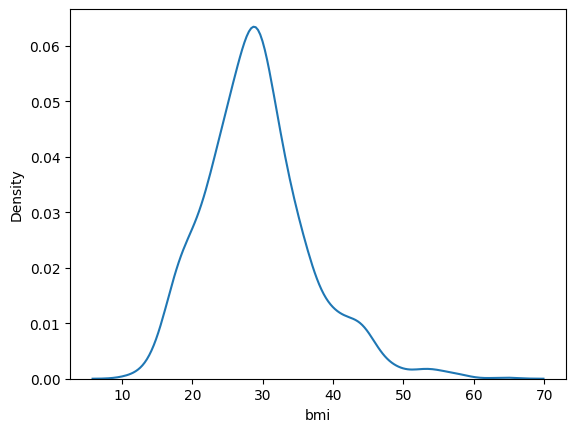

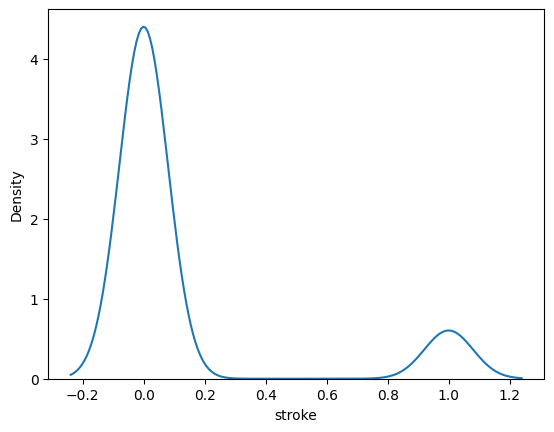

In [10]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.kdeplot(x=df[i])
        plt.show()

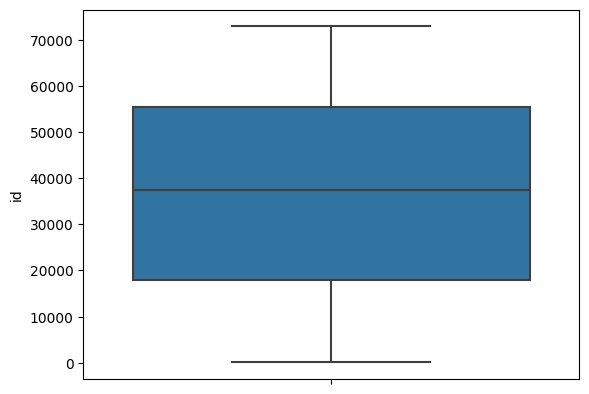

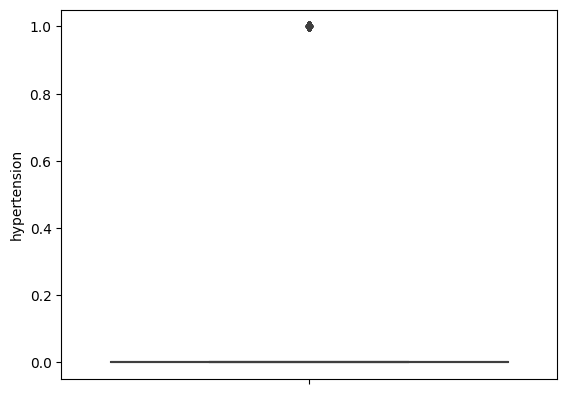

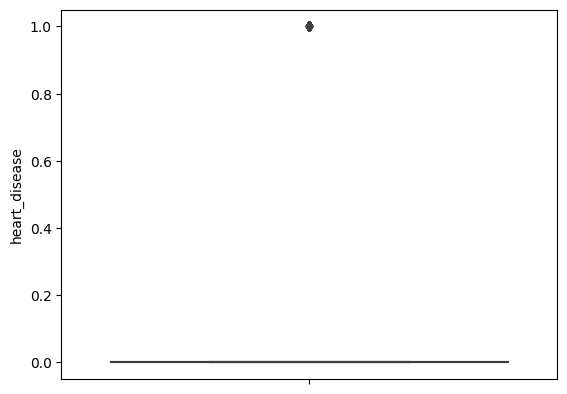

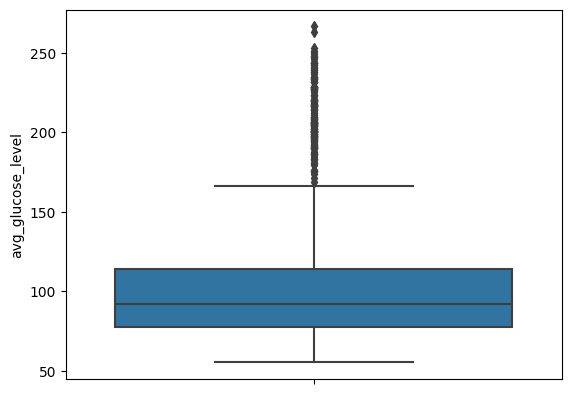

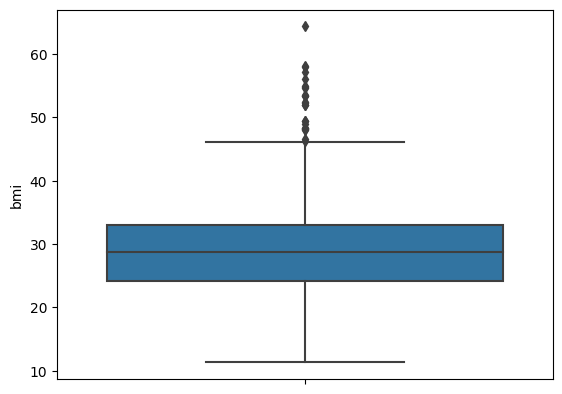

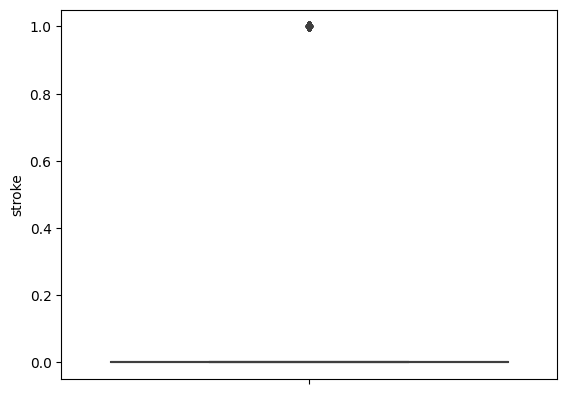

In [11]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y=df[i])
        plt.show()

##### Multivariate Analysis

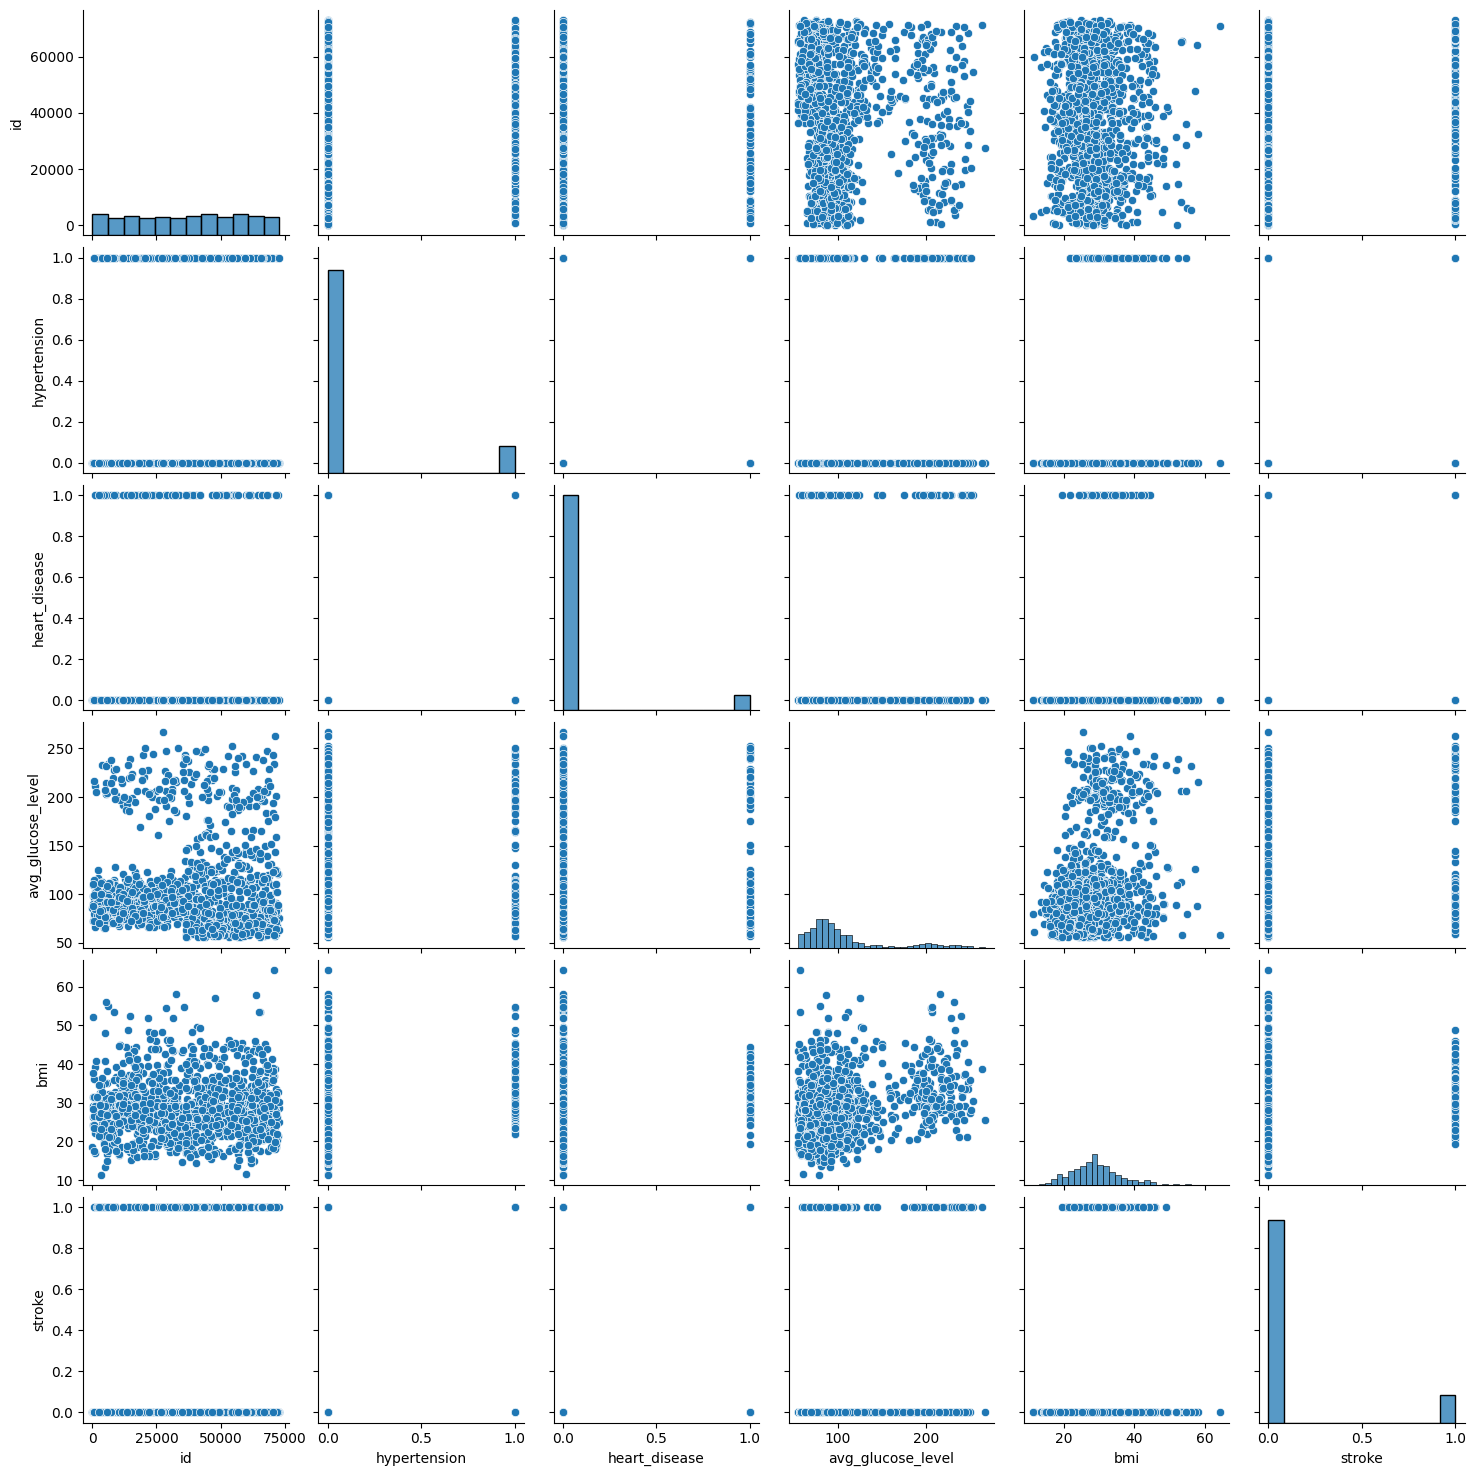

In [12]:
sns.pairplot(data=df);

Text(0.5, 1.0, 'Count of people in their work type')

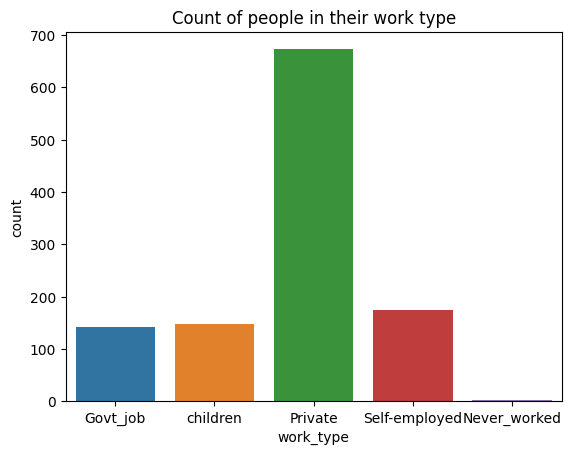

In [13]:
sns.countplot(x='work_type', data=df)
plt.title('Count of people in their work type')

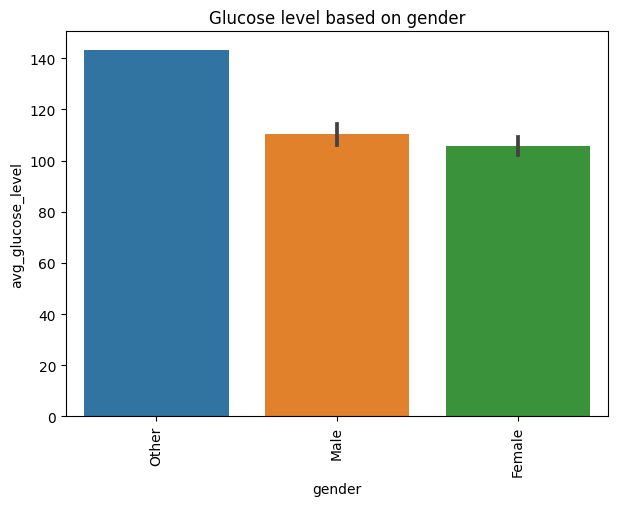

In [14]:
plt.figure(figsize=(7,5))
plt.title('Glucose level based on gender')
sns.barplot(x='gender', y='avg_glucose_level', data=df.sort_values(by='gender', ascending=False))
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Count of smoking status')

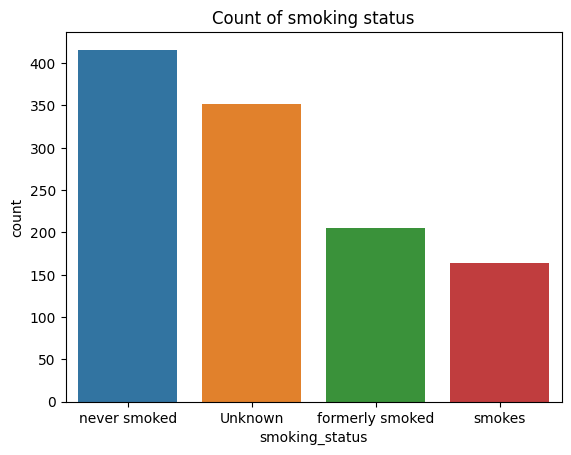

In [15]:
sns.countplot(x='smoking_status', data=df)
plt.title('Count of smoking status')

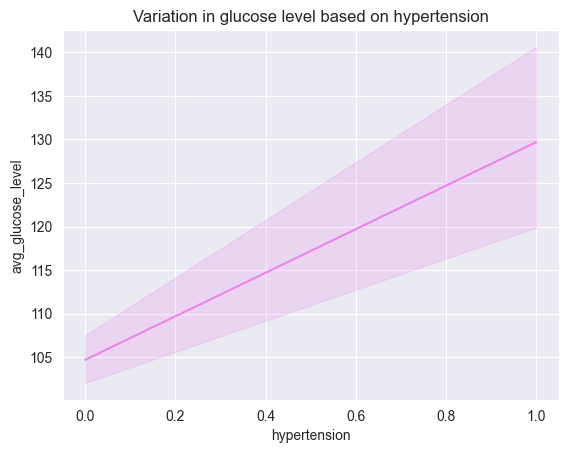

In [16]:
sns.set_style('darkgrid')
plt.title('Variation in glucose level based on hypertension')
sns.lineplot(x='hypertension', y='avg_glucose_level', data=df.sort_values(by='hypertension'),color='violet');

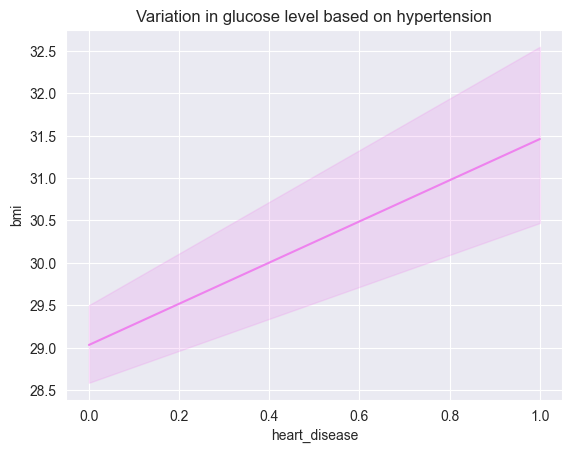

In [17]:
sns.set_style('darkgrid')
plt.title('Variation in glucose level based on hypertension')
sns.lineplot(x='heart_disease', y='bmi', data=df.sort_values(by='bmi'),color='violet');

##### Label Encoding The Categorical Columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1137 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


In [19]:
le = LabelEncoder()

In [20]:
df['gender'] = le.fit_transform(df['gender'])
df['age'] = le.fit_transform(df['age'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,0,26,0,0,0,0,0,70.66,27.2,2,0
1,77,0,6,0,0,0,4,0,85.81,18.6,0,0
2,59200,1,11,0,0,0,2,1,60.56,33.0,2,0
3,24905,0,63,0,0,1,2,1,205.77,46.0,1,1
4,24257,1,35,0,0,0,4,0,90.42,16.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1132,18205,0,2,0,0,0,4,0,110.17,20.3,0,0
1133,13622,1,57,0,0,0,4,0,92.98,18.9,0,0
1134,59749,1,81,0,0,1,2,1,234.35,25.3,1,0
1135,12109,0,81,1,0,1,2,0,80.43,29.7,2,1


In [21]:
sc=StandardScaler()

In [22]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

##### Cross Validation

In [23]:
models = {
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}

In [24]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=20,n_jobs=-1)
    print("cross validation model : {}".format(name))
    average_score = np.mean(scores)*100
    print("AVERAGE SCORE: ",average_score)
    print("*"*100)

cross validation model : DecisionTreeClassifier
AVERAGE SCORE:  81.36278195488721
****************************************************************************************************
cross validation model : RandomForestClassifier
AVERAGE SCORE:  87.06923558897243
****************************************************************************************************
cross validation model : KNeighborsClassifier
AVERAGE SCORE:  86.72462406015038
****************************************************************************************************
cross validation model : GradientBoostingClassifier
AVERAGE SCORE:  86.71992481203009
****************************************************************************************************


##### Lets proceed with RandomForestClassifier

In [25]:
model= RandomForestClassifier()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8552631578947368
confusion_matrix train is::  [[801   0]
 [  0 108]]
confusion_matrix test is::  [[194   5]
 [ 28   1]]
Wrong Predictions made: 33 / 228


##### Confusion matrix for training and testing data

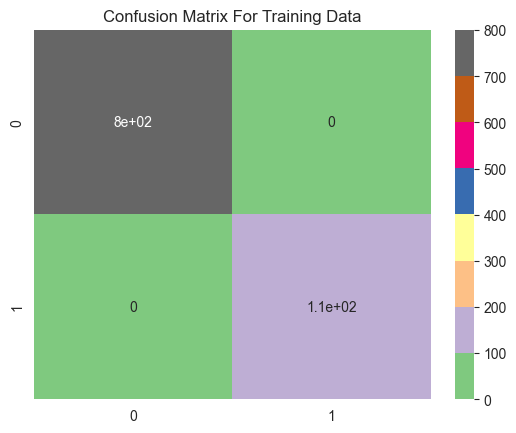

In [28]:
plt.title('Confusion Matrix For Training Data')
sns.heatmap(con_train, annot=True, cmap='Accent');

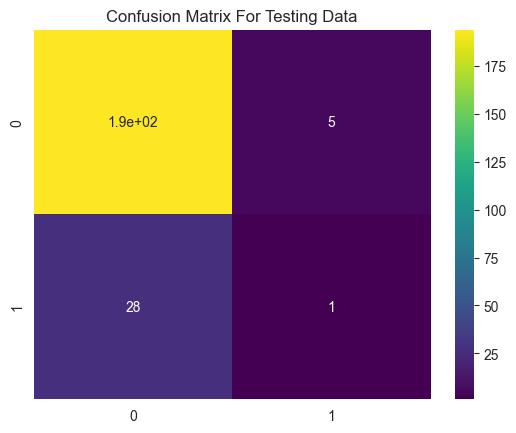

In [29]:
plt.title('Confusion Matrix For Testing Data')
sns.heatmap(con_test, annot=True, cmap='viridis');

##### ROC Curve

Model used is::  RandomForestClassifier()


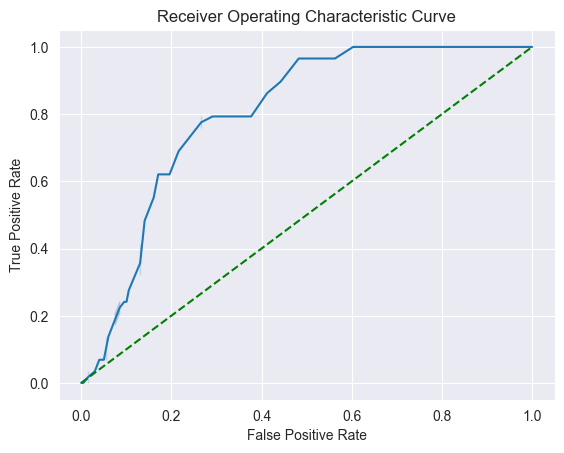

In [30]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()